# Pandas and Seaborn

Pandas is a Python library that provides data structures and data analysis tools. Seaborn is a Python visualization library based on matplotlib that provides a high-level interface for drawing attractive statistical graphics. In this notebook, we will explore the basics of Pandas and Seaborn.

We will use what we've learned about numpy and matplotlib, because pandas and seaborn are built on top of numpy and matplotlib, respectively. This means that we can use numpy arrays and matplotlib plots with pandas and seaborn, and they will work seamlessly together.

Let's start by installing and importing the necessary libraries.

In [ ]:
# only need to do this once per Colab session
!pip install -q pandas seaborn

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Pandas

you can see `pandas` as a 'wrapper' around `numpy`, which makes it easier to keep track of what your data represents: it provides data structures and data analysis tools. The main data structures in `pandas` are `Series` and `DataFrame`. Let's make some, just to try stuff out. 

### Series

A `Series` is a one-dimensional array-like object containing an array of data and an associated array of data labels, called its index. The simplest `Series` is formed from only an array of data, like this:


In [3]:
sery = pd.Series(np.random.randn(1000), index=np.linspace(0, 10, 1000, endpoint=False))

And in principle the `sery` variable is nothing more than a `numpy` array, but with an index. This means we can use `numpy` functions on it and plot it using `matplotlib`, but we can also use the index to access elements for added flexibility.

When plotting these `Series` objects, `matplotlib` immediately recognizes the index as the x-axis, which is very convenient.

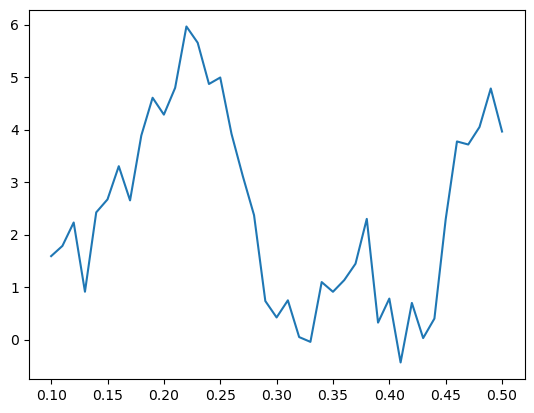

In [4]:
# here we index the series by the time index, which is a float
# then we use a numpy function (cumsum) on it, which returns a numpy array
# finally, we plot the numpy array
# this is a common pattern in pandas, where you use numpy functions on pandas objects
# and then plot the result

plt.plot(sery[0.1:0.5].cumsum())

<Axes: >

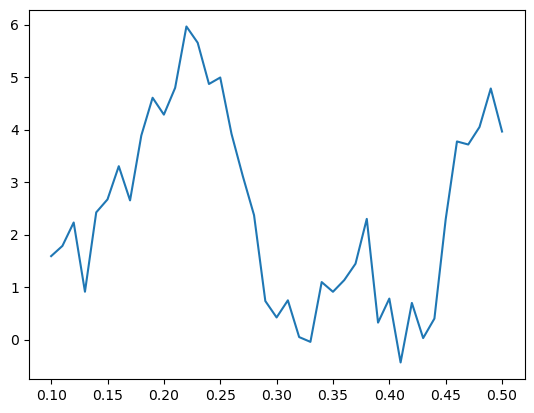

In [5]:
# for extra handiness you can use the .plot method on the series itself

sery[0.1:0.5].cumsum().plot()

See what pandas did for us here? Because now we can use a meaningful index instead of a meaningless integer index. This is the power of pandas: it makes it easier to keep track of what your data represents.

This works especially well when working with times and dates, which is a common use case for pandas. Let's see how that works.

<Axes: >

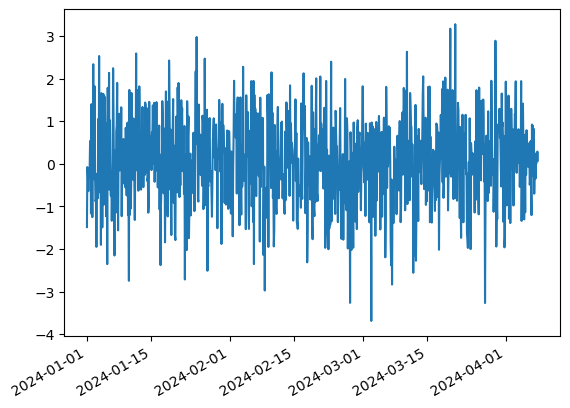

In [12]:
date_sery = pd.Series(np.random.randn(1000),
          index=pd.date_range(start='1/1/2024',
                              end='4/08/2024',
                              periods=1000)
        )
date_sery.plot()

And when working with time, we can use boolean indexing to select periods of dates / times. This is very powerful, because it allows us to easily select data from a certain period.

<Axes: >

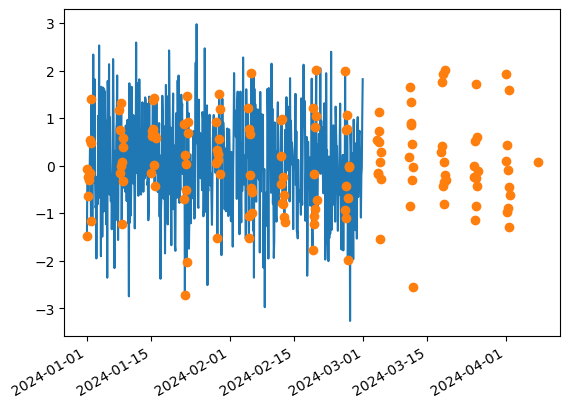

In [21]:
date_sery[date_sery.index < "2024-3-1"].plot()

date_sery[date_sery.index.dayofweek == 0].plot(marker='o', lw=0)

<div class='alert alert-warning'>
<b>ToDo</b> (1 point)
</div>

From `date_sery`, plot the histogram of values that are greater than 0.5, and where `days_in_month` is greater than 15 (that fall in the second half of the month). You will need to combine multiple boolean indexes using the `&` operator. **Mind the brackets!**

In [ ]:
# Implement the ToDo here

# your solution here


## DataFrames


A `DataFrame` represents a tabular, spreadsheet-like data structure containing an ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc.). The `DataFrame` has both a row and column index; it can be thought of as a dictionary of `Series` all sharing the same index.

We can create a `DataFrame` from a numpy array like this, by explicitly naming the index and columns as arguments when creating the `DataFrame`:

In [7]:
df = pd.DataFrame(np.random.randn(1000, 4),
             index=sery.index,
             columns=list('ABCD'))

Or from a dictionary of `Series` objects, like this:

In [25]:
df = pd.DataFrame({col: pd.Series(np.random.randn(1000)+np.random.randint(1,10),
                            index=sery.index) for col in list('ABCD')})

Plotting `DataFrames` is very quick, and has reasonable defaults which take care of the axis labeling and legend for you: way nicer than having to do this yourself in `numpy`, right? 

<Axes: >

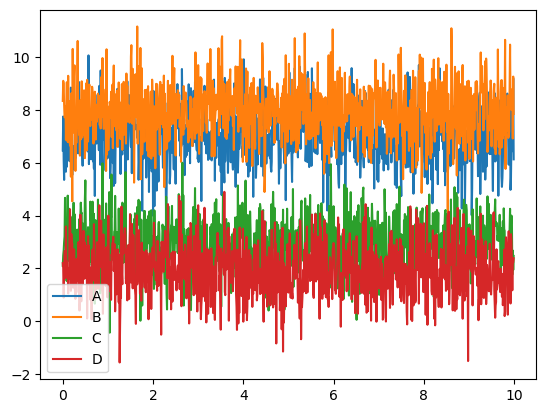

In [27]:
df.plot()